In [1]:
import os
import urllib.request
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm

Until now we have: 
   - 208 Cataracts. 175 from previous set and 33 from latest set 
   - 322 Healthy. 200 from previous set and 122 from latest set

In [2]:
path = '/home/khaldoun/Desktop/TOV_DataAcquisition/Datasets/UNHAS'

# path = 'Datasets\\UNHAS'
filename='UnhasImagesCataractsCropped.csv'
filename2='UnhasImagesHealthyCropped.csv'
csv_path=os.path.join(path,filename)
csv_path2=os.path.join(path,filename2)
df_cataracts = pd.read_csv(csv_path)
df_healthy = pd.read_csv(csv_path2)

In [3]:
print(df_cataracts.head())
print(df_healthy.head())

       folder                                        filename  height  width  \
0  17-03-2021      WhatsApp Image 2021-03-17 at 08.28.40.jpeg    1280    988   
1  17-03-2021  WhatsApp Image 2021-03-17 at 08.16.08 (1).jpeg     984   1045   
2  17-03-2021      WhatsApp Image 2021-03-17 at 08.28.38.jpeg     227    324   
3  17-03-2021  WhatsApp Image 2021-03-17 at 08.16.12 (1).jpeg     270    300   
4  17-03-2021      WhatsApp Image 2021-03-24 at 11.53.24.jpeg     992   1280   

   bands  filesize(KB)  
0      3       161.712  
1      3       550.775  
2      3        42.335  
3      3        50.687  
4      3       130.944  
          folder                                        filename  height  \
0  Koass unismuh      WhatsApp Image 2021-03-20 at 08.33.13.jpeg     978   
1  Koass unismuh  WhatsApp Image 2021-03-23 at 12.10.21 (2).jpeg     914   
2  Koass unismuh      WhatsApp Image 2021-03-24 at 10.39.05.jpeg    1016   
3  Koass unismuh      WhatsApp Image 2021-03-24 at 15.34.55.jpeg 

In [4]:
#Reading cataract images
cat_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesCataractsCropped')
file_names = df_cataracts.filename
row=64
col=64

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        cat_images.append(image)
    except:
        noread.append(image_name)
        continue

cat_images = np.array(cat_images)
noread = np.array(noread)

100%|██████████| 208/208 [00:00<00:00, 324.08it/s]


In [5]:
cat_images.shape

(208, 64, 64, 3)

In [6]:
#Reading healthy images
healthy_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesHealthyCropped')
file_names = df_healthy.filename
row=64
col=64

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        healthy_images.append(image)
    except:
        noread.append(image_name)
        continue
        
healthy_images = np.array(healthy_images)
noread = np.array(noread)

100%|██████████| 322/322 [00:01<00:00, 171.65it/s]


In [7]:
healthy_images.shape

(322, 64, 64, 3)

# Prepare Data for Machine Learning|


In [8]:
cat_images.shape

(208, 64, 64, 3)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd 


images = []
labels = []

for i , d in enumerate(cat_images):
    images.append(d)
    labels.append(1)
for i , d in enumerate(healthy_images):
    images.append(d)
    labels.append(0)  
    
Images = np.array(images)
Labels = np.array(labels)

0


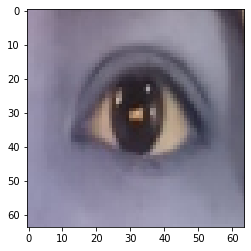

0


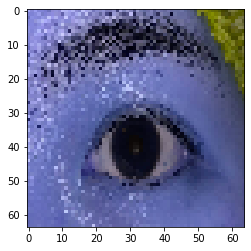

0


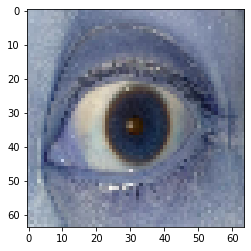

0


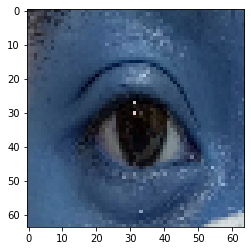

1


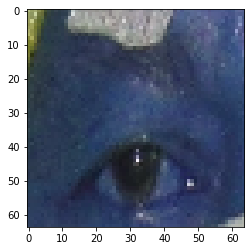

0


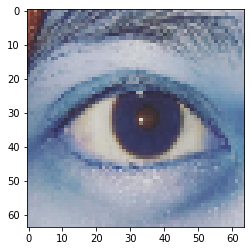

1


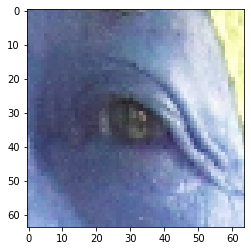

0


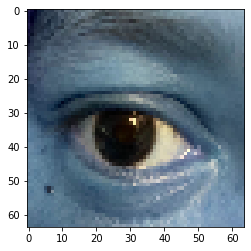

1


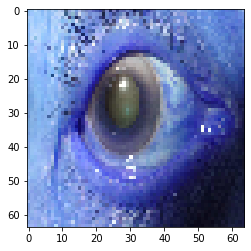

1


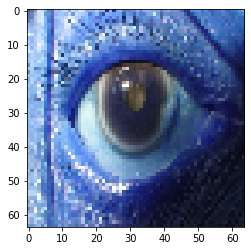

In [10]:
import random 
for i in range(10):
    n = random.randint(0,len(labels))
    plt.imshow(images[n])
    print(labels[n])
    plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.20, shuffle = True, random_state = 1)


In [12]:
from random import sample
#prepare training data by sampling 
temp = []
for idx, label in enumerate(y_train):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in y_train if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

temp = []
for idx, label in enumerate(y_train):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

X_data = np.array(X_data)
y_data = np.array(y_data)


print(X_data.shape, y_data.shape)

pd.DataFrame(y_data).value_counts()

(348, 64, 64, 3) (348,)


1    174
0    174
dtype: int64

In [13]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model
import tensorflow as tf

In [14]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(BatchNormalization())
model.add(layers.Dense(1))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss = 'mse',metrics=['accuracy'])

In [15]:


history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
14/14 [==============================] - 1s 58ms/step - loss: 4.9212 - accuracy: 0.5896
Epoch 2/40
14/14 [==============================] - 1s 58ms/step - loss: 0.4482 - accuracy: 0.7241
Epoch 3/40
14/14 [==============================] - 1s 61ms/step - loss: 0.3593 - accuracy: 0.7382
Epoch 4/40
14/14 [==============================] - 1s 60ms/step - loss: 0.3757 - accuracy: 0.7123
Epoch 5/40
14/14 [==============================] - 1s 59ms/step - loss: 0.2703 - accuracy: 0.7618
Epoch 6/40
14/14 [==============================] - 1s 69ms/step - loss: 0.2991 - accuracy: 0.7217
Epoch 7/40
14/14 [==============================] - 1s 78ms/step - loss: 0.2830 - accuracy: 0.7264
Epoch 8/40
14/14 [==============================] - 1s 70ms/step - loss: 0.2513 - accuracy: 0.7759
Epoch 9/40
14/14 [==============================] - 1s 66ms/step - loss: 0.3099 - accuracy: 0.7689
Epoch 10/40
14/14 [==============================] - 1s 68ms/step - loss: 0.3263 - accuracy: 0.7406
Epoch 11/

4/4 - 0s - loss: 0.3041 - accuracy: 0.5472


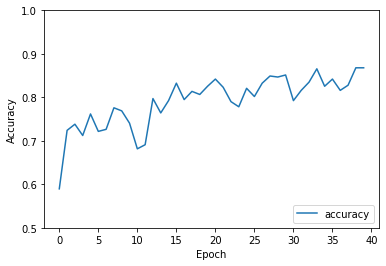

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn import  metrics
expected = y_test
predicted = model.predict(X_test)
predicted

array([[ 0.86195606],
       [ 0.7338587 ],
       [ 0.83229274],
       [ 0.9945188 ],
       [ 0.75946647],
       [ 0.6922289 ],
       [ 0.60334414],
       [ 0.2174154 ],
       [ 0.6543735 ],
       [ 1.1161108 ],
       [ 0.7428954 ],
       [ 1.049562  ],
       [ 0.22534622],
       [ 0.35626465],
       [ 0.59820205],
       [ 0.6178482 ],
       [ 0.83669806],
       [ 0.699924  ],
       [-0.16050129],
       [ 0.07233195],
       [ 0.4364279 ],
       [ 0.46945304],
       [ 0.56562203],
       [ 0.09535964],
       [ 0.9630019 ],
       [ 1.030189  ],
       [ 0.755159  ],
       [ 0.52167654],
       [ 0.5472653 ],
       [ 0.6827484 ],
       [ 0.3458137 ],
       [ 0.64026254],
       [-0.11692175],
       [ 0.49504632],
       [ 0.53935444],
       [ 0.06139357],
       [ 0.80778354],
       [ 0.47012025],
       [ 0.5610086 ],
       [-0.21127735],
       [ 0.29963237],
       [ 0.8911007 ],
       [ 0.46976703],
       [ 0.75772375],
       [ 0.7551635 ],
       [ 0